In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [15]:
df= pd.read_csv("/content/sample_data/final_data.csv")


In [11]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


<Axes: xlabel='appearance', ylabel='days_injured'>

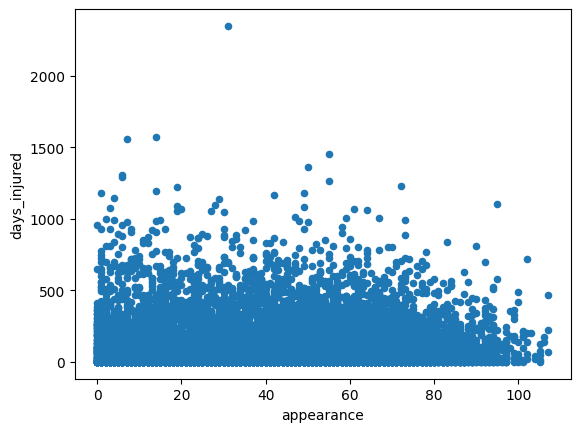

In [45]:
df.plot.scatter(x="appearance",y="days_injured")

In [58]:

model=LinearRegression()
model.fit(df[["appearance"]], df["days_injured"])

LinearRegression()

In [59]:
model.predict([[10],[100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 95.74635572, 171.46033713])

In [61]:
print(f"la linea que intersecta en :{model.intercept_} y tiene una pendiente de {model.coef_}")

la linea que intersecta en :87.3336911143803 y tiene una pendiente de [0.84126646]


In [62]:
model.coef_ *df["appearance"]+ model.intercept_

0        174.825403
1         99.952688
2         90.698757
3        156.317541
4        140.333478
            ...    
10749    100.793954
10750    109.206619
10751    104.159020
10752    101.635221
10753    105.000287
Name: appearance, Length: 10754, dtype: float64

In [66]:
pred=pd.Series(model.predict(df[["appearance"]]))

0        174.825403
1         99.952688
2         90.698757
3        156.317541
4        140.333478
            ...    
10749    100.793954
10750    109.206619
10751    104.159020
10752    101.635221
10753    105.000287
Length: 10754, dtype: float64

In [69]:
df["Prediccion"]=pred

In [70]:
df

,player,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Prediccion
0,/david-de-gea/profil/spieler/59377,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,...,0.335463,9390,42,5,13,15000000,70000000,1,0,174.825403
1,/jack-butland/profil/spieler/128899,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,...,0.207055,1304,510,58,1,1500000,22000000,1,0,99.952688
2,/tom-heaton/profil/spieler/34130,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.924658,292,697,84,4,600000,6000000,1,0,90.698757
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,6408,175,22,9,50000000,50000000,2,0,156.317541
4,/raphael-varane/profil/spieler/164770,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,5031,238,51,21,40000000,80000000,2,0,140.333478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,1023,0,0,0,75000,75000,4,1,100.793954
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,1449,102,18,0,300000,300000,4,0,109.206619
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,960,0,0,0,50000,50000,4,0,104.159020
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,865,0,0,0,50000,50000,4,0,101.635221


<Axes: xlabel='appearance', ylabel='days_injured'>

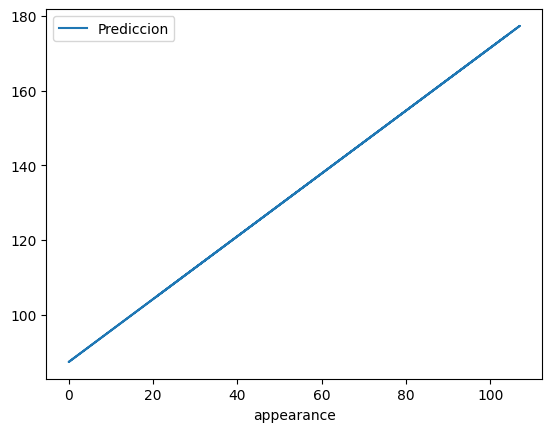

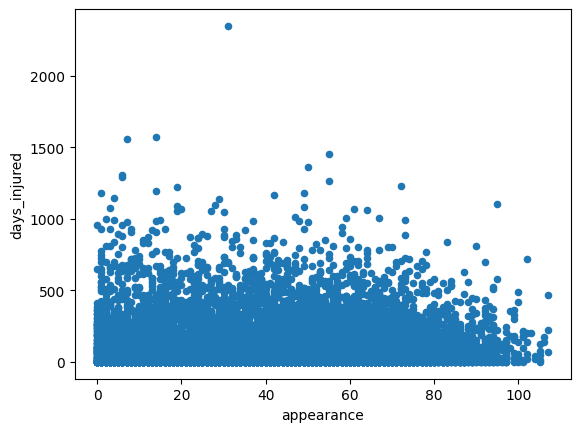

In [82]:
linea=df.plot.line(x="appearance",y="Prediccion")
df.plot.scatter(x="appearance",y="days_injured")

<Axes: xlabel='appearance'>

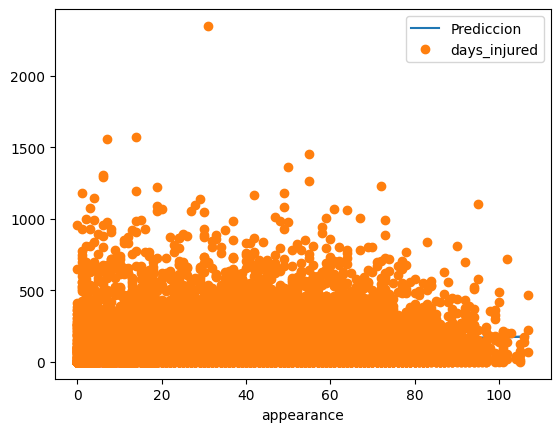

In [91]:
df.plot(x="appearance", y=["Prediccion", "days_injured"], style=["-", "o"])